<a href="https://colab.research.google.com/github/keshav123333/Machine_learning_100_campusx/blob/main/Function_or_Power_Tranformer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import cross_val_score

# function plot

kuch model nomral dist data pe acha work karte as outlier is controlled in that and usme bhi linear model ko benfit karte hai  so hum vaise hi data bane ki kosis karenge aaj  

it can be done by various method

1. use pd.skew() is ye 0 toh normal if postive toh right ske if -ve toh left skew
2. you can plot sns.distplot
3. qq tranformation if line pe pura toh normal dist if upar se utha toh right skew if niche se toh left skew

*Types*
1. if right skew toh log tranformation log10x kar dete
2. if left skew toh x^2

In [ ]:
df=sns.load_dataset('titanic')

In [ ]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [ ]:
df=df[["age","fare","survived"]]

In [ ]:
df['age'].fillna(df['age'].mean(),inplace=True)

/tmp/ipython-input-1492264711.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].mean(),inplace=True)
/tmp/ipython-input-1492264711.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age'].fillna(df['age'].mean(),inplace=True)


In [ ]:
x=df.loc[:,["fare","age"]]
y=df.iloc[:,-1]

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)

/tmp/ipython-input-3494741952.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(xtrain['fare'])


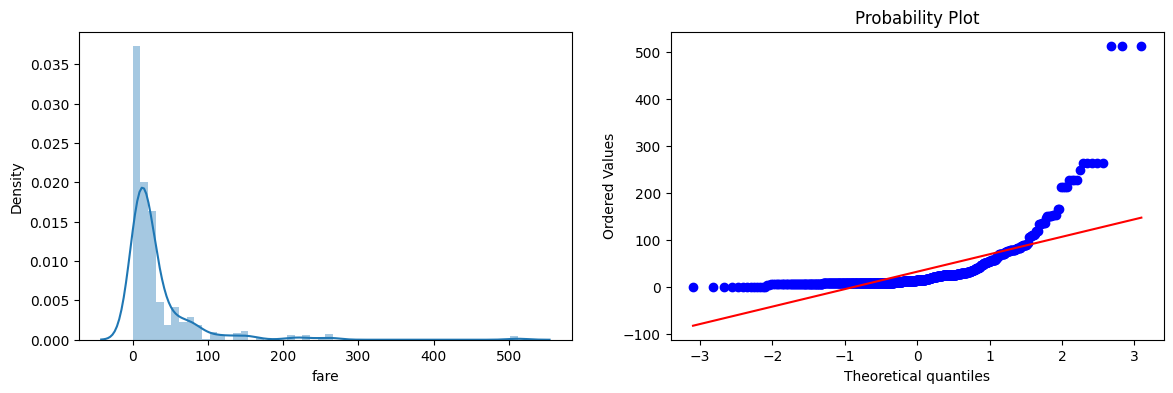

In [ ]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(xtrain['fare'])


# this is qq plot

plt.subplot(122)
stats.probplot(xtrain['fare'], dist="norm", plot=plt)
plt.show()

#ye right skew hai not left skew

In [ ]:
xtrain['fare'].skew() # right skew

np.float64(4.875065571137606)

In [ ]:
trf=FunctionTransformer(func=np.log1p)  #right ske toh ye laga
# imp func mein apna custopm function bhi laga sakte ho tum lambda x: x**3 iae kuch
# xtrain_trf=trf.fit_transform(xtrain['fare'])
# xtest_trf=trf.transform(xtest['fare']) aise bhi laga sakte if fare pe sirf
xtrain_trf=trf.fit_transform(xtrain )
xtest_trf=trf.transform(xtest )

In [ ]:
xtrain_trf['fare'].skew()  #kam hua

np.float64(0.4035544160490457)

In [ ]:
xtrain["age"].skew()

np.float64(0.3599658846236587)

In [ ]:
# ab model train kar le ispe \

trf2=ColumnTransformer([
    ("log",FunctionTransformer(np.log1p),["fare"]),
    ("square",FunctionTransformer(np.square),["age"]) #age bhi right skew hi bas exaple ke liye ki alag alg traformation laga skate ho tum
],remainder="passthrough")


In [ ]:
xtrain=trf2.fit_transform(xtrain)
xtest=trf2.transform(xtest)

# power tranform

box cox tranform lagya pehle isme ye apne aap usko laane ki kosis function mein humne apna traform lagaya tha

rules :
no -ve , no zero

In [3]:
from sklearn.preprocessing import PowerTransformer
import pandas as pd


In [4]:
df=pd.read_csv("https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/refs/heads/main/day31-power-transformer/concrete_data.csv")

In [6]:
df

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [8]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(df.drop(columns=["Strength"]),df["Strength"],test_size=0.2,random_state=42)

In [10]:
pt=PowerTransformer(method='box-cox')
xtrain_tranform=pt.fit_transform(xtrain+0.000001) #ye add jisse edge cases handle ho jaye
xtest_tranform=pt.transform(xtest+0.00000001)

In [12]:
pd.DataFrame({'cols':xtrain.columns,'before':xtrain.skew(),'after':pd.DataFrame(xtrain_tranform, columns=xtrain.columns).skew()})

,cols,before,after
Cement,Cement,0.493343,-0.021176
Blast Furnace Slag,Blast Furnace Slag,0.802065,-0.153803
Fly Ash,Fly Ash,0.566038,0.241030
Water,Water,0.091973,0.004858
Superplasticizer,Superplasticizer,0.897750,-0.517207
Coarse Aggregate,Coarse Aggregate,-0.041485,-0.020079
Fine Aggregate,Fine Aggregate,-0.239988,-0.013929
Age,Age,3.335411,-0.007384


In [13]:
pd.DataFrame({"col":xtrain.columns,"box_cox_labbda":pt.lambdas_})
#ye vo labda jisse humne har col ki value ko sclae ye har col ke liye cal
#jaise pehel ek cement col ke andar 540 toh ab 540^0.177025 hogi aise sari row ke liye

,col,box_cox_labbda
0,Cement,0.177025
1,Blast Furnace Slag,0.025093
2,Fly Ash,-0.038970
3,Water,0.772682
4,Superplasticizer,0.098811
5,Coarse Aggregate,1.129813
6,Fine Aggregate,1.782018
7,Age,0.066631


  Now we will apply yeo jhonson tranformer on this

In [14]:
pt1=PowerTransformer()#by default ye hi hota and ye best as -ve ko bhi handle
xtrain_tranform1=pt1.fit_transform(xtrain)
xtest_tranform1=pt1.fit_transform(xtest)

In [17]:
lr=LinearRegression()
lr.fit(xtrain_tranform,ytrain)
y_pred=lr.predict(xtest_tranform)

In [ ]:
#you can plot qq plot before and after for checking too iske baad tum standarized bhi kar sakte ho